In [1]:
import pandas as pd

In [2]:
#read in data
file_childDesert = 'df_childDesert.csv'
df_childDesert = pd.read_csv(file_childDesert)
#df_childDesert

In [3]:
import matplotlib.pyplot as plt

In [4]:
des = df_childDesert[(df_childDesert.Desert == 1)].sum()['ageless5']
des_pop = df_childDesert[(df_childDesert.Desert == 1)].sum()['pop']
des_zip = df_childDesert[(df_childDesert.Desert == 1)].count()['zipcode']

In [5]:
not_des = df_childDesert[(df_childDesert.Not_Desert == 1)].sum()['ageless5']
not_des_pop = df_childDesert[(df_childDesert.Not_Desert == 1)].sum()['pop']
not_des_zip = df_childDesert[(df_childDesert.Not_Desert == 1)].count()['zipcode']

In [6]:
few = df_childDesert[(df_childDesert.Few_Child == 1)].sum()['ageless5']
few_pop = df_childDesert[(df_childDesert.Few_Child == 1)].sum()['pop']
few_zip = df_childDesert[(df_childDesert.Few_Child == 1)].count()['zipcode']
few_zip

54

In [7]:
df_Hist = pd.DataFrame([['Desert', des, des_pop,des_zip],['Not_Desert',not_des,not_des_pop,not_des_zip],['Few_Children',few,few_pop,few_zip]], columns=['Classification', 'Pop_5_or_Younger', 'Pop_Total','Zipcode_Count'])

In [8]:
df_Hist

,Classification,Pop_5_or_Younger,Pop_Total,Zipcode_Count
0,Desert,124382.0,1685202.0,108
1,Not_Desert,198910.0,3538791.0,214
2,Few_Children,643.0,32435.0,54


In [9]:
import numpy as np
import matplotlib.pyplot as plt

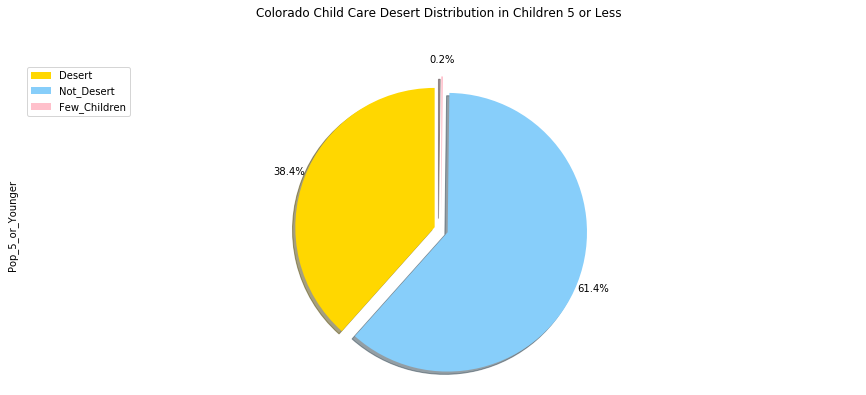

In [10]:
colors_list = ['gold', 'lightskyblue', 'pink']
explode_list = [0.05, 0.05, 0.1]

df_Hist['Pop_5_or_Younger'].plot(kind='pie',
                     figsize=(15, 6),
                     autopct='%1.1f%%', 
                     startangle=90,    
                     shadow=True,       
                     labels=None,         # turn off labels on pie chart
                     pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                     colors=colors_list,  # add custom colors
                     explode=explode_list # 'explode' lowest 3 continents
                    )

# scale the title up by 12% to match pctdistance
plt.title('Colorado Child Care Desert Distribution in Children 5 or Less ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_Hist['Classification'], loc='upper left') 

plt.show()


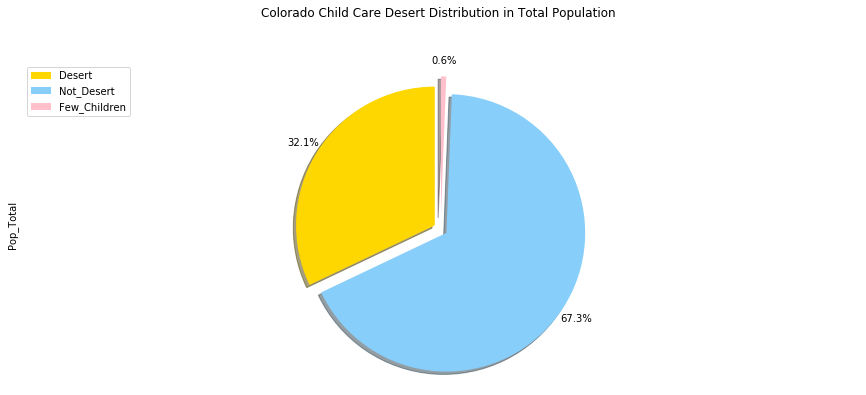

In [11]:
colors_list = ['gold', 'lightskyblue', 'pink']
explode_list = [0.05, 0.05, 0.1]

df_Hist['Pop_Total'].plot(kind='pie',
                     figsize=(15, 6),
                     autopct='%1.1f%%', 
                     startangle=90,    
                     shadow=True,       
                     labels=None,         # turn off labels on pie chart
                     pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                     colors=colors_list,  # add custom colors
                     explode=explode_list # 'explode' lowest 3 continents
                    )

# scale the title up by 12% to match pctdistance
plt.title('Colorado Child Care Desert Distribution in Total Population ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_Hist['Classification'], loc='upper left') 

plt.show()

In [12]:
df_childDesert['Not_Desert'] = df_childDesert['Not_Desert'].apply(lambda x: x*3)
df_childDesert['Few_Child'] = df_childDesert['Few_Child'].apply(lambda x: x*2)
df_childDesert['Classification'] = df_childDesert['Desert']+df_childDesert['Few_Child']+df_childDesert['Not_Desert']
df_childDesert.head()

,Unnamed: 0,zipcode,child capacity,ageless5,pop,Latitude,Longitude,radius_meters,Desert,Few_Child,Not_Desert,Classification
0,0,80477,203.0,0,146,40.348242,-106.92691,100,0,2,0,2
1,1,80478,39.0,27,1625,40.001670,-105.86860,5200,0,2,0,2
2,2,80480,15.0,89,1342,40.621621,-106.24457,31400,1,0,0,1
3,3,80481,486.0,6,601,40.106130,-105.48044,6800,0,2,0,2
4,4,80483,36.0,56,660,40.149432,-106.90681,7500,0,0,3,3


In [13]:
df_childDesert.to_csv(r'df_childDesert_Labeled.csv')

In [14]:
colo_geojson = r'Census_Zip_Codes_in_Colorado_2017_geojson.json'

In [15]:
latitude = 38.7251776
longitude = -105.6077167
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
colo_map = folium.Map(location=[latitude, longitude], zoom_start=6)
colo_map



In [20]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
kclusters = 3

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = ['gold','pink','lightskyblue']
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, rad in zip(df_childDesert['Latitude'], df_childDesert['Longitude'], df_childDesert['zipcode'], df_childDesert['Classification'], df_childDesert['radius_meters']):
    label = folium.Popup(str(poi) + 'Class' + str(cluster), parse_html=True)
    folium.Circle(
        [lat, lon],
        radius=rad/2,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [32]:
df_childDesert = df_childDesert.drop(columns = ['Unnamed: 0'])
df_childDesert.to_csv(r'df_childDesertClass.csv')